# Assignment 2
### Understanding Uncertainty
### Due 9/12

In [2]:
import pandas as pd

In [3]:
idf = pd.read_csv('C:/Users/school/understanding_uncertainty/data/iowa.csv') # Iowa Liquor Sales Data

In [4]:
idf.head(3)

,Invoice/Item Number,Date,Store Number,Store Name,Zip Code,Category Name,Vendor Name,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars)
0,INV-59108400026,06/06/2023,3723,J D SPIRITS LIQUOR,51040,STRAIGHT RYE WHISKIES,INFINIUM SPIRITS,27102,TEMPLETON RYE 4YR,750,18.09,27.14,2,54.28
1,S16879800057,01/16/2014,3926,LIQUOR DOWNTOWN / IOWA CITY,52240,VODKA 80 PROOF,HEAVEN HILL BRANDS,35416,BURNETT'S VODKA 80 PRF,750,4.84,7.26,12,87.12
2,INV-05301100019,06/05/2017,3829,GARY'S FOODS / MT VERNON,52314,CANADIAN WHISKIES,DIAGEO AMERICAS,11296,CROWN ROYAL,750,15.59,23.39,6,135.66


1. 'State Bottle Retail' is the price at which the bottle is sold, while 'State Bottle Cost' is the price the state pays for a bottle.
- How do you define the most profitable item? Why? Explain your thinking.
- Use `.groupby` calculations to determine the most profitable liquors sold in Iowa.
- Make a plot of the top liquors.

Question 1 part 1:

THere are a few ways one could determine which liqour is the most profitable, depending on factors like each type of bottle sold or combinind ml of bottles of the same type and then calculating it that way, but in my case I am going to use bottles sold because by my own definition, even if two bottles have the same type of liquor, the different mls per bottle make them completely different items. 

So I would do (retail - cost) * bottles sold by item number to find the most profitable item. 

Question 1 part 2

In [9]:
#find actual profit per bottle sold

idf['profit_per_bottle'] = idf['State Bottle Retail'] - idf['State Bottle Cost']

In [10]:
#overall profit per item
idf['profit'] = idf['profit_per_bottle'] * idf['Bottles Sold']

In [18]:
most_profit = idf['profit'].groupby([idf['Item Description']]).sum().sort_values(ascending=False).head()

In [19]:
most_profit

Item Description
TITOS HANDMADE VODKA         364074.35
BLACK VELVET                 274676.85
FIREBALL CINNAMON WHISKEY    187535.22
CROWN ROYAL                  160981.95
CROWN ROYAL REGAL APPLE      122880.40
Name: profit, dtype: float64

most profitable liquors (not items since this doesn't specify for items): tito's handmade vodka, black velvet, fireball cinnamon whiskey, crown royal, crown royal regal apple, in that order from most to least profitable

Question 1 part 3

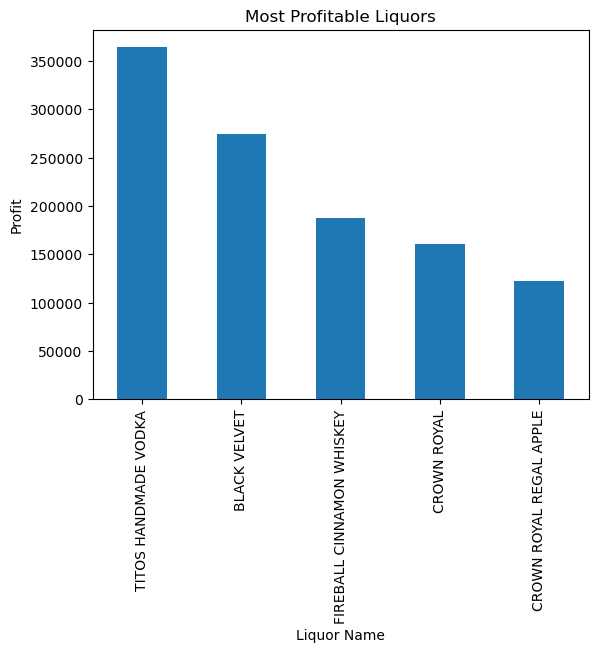

In [23]:
barplot = most_profit.plot.bar(title='Most Profitable Liquors', ylabel='Profit', xlabel='Liquor Name')

2. This question is to further explore broadcasting in NumPy.

- In the first code chunk below, there are two vectors, $x$ and $y$. What happens when you try to subtract them?
- Instead, try `x.reshape(-1,1)-y.reshape(-1,1)`. What do you get?
- Try `x.reshape(1,-1)-y.reshape(1,-1)`. Compare the results to your previous answer.
- Write two double for-loops to replicate the results of the previous two answers. 
- Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$

In [27]:
import numpy as np

x = np.array([1,3,5])
y = np.array([2,5])

In [24]:
# Part 1
x-y

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

gave an error because the shapes were not compatible for subtraction

In [41]:
# Part 2
x.reshape(1,-1)-y.reshape(-1,1)

array([[-1,  1,  3],
       [-4, -2,  0]])

the resulting value is an array with the shape 2x3

In [33]:
#Part 3
x.reshape(-1,1)-y.reshape(1,-1)

array([[-1, -4],
       [ 1, -2],
       [ 3,  0]])

this results in an array of shape 3x2, and it is also a transpose of the array from the previous part

In [42]:
def matrix_sub(x,y,transposeval=0): #where x and y are 1d arrays
    cols = x.size
    rows = y.size
    return_array = [[0 for _ in range(cols)] for _ in range(rows)]
    for i in range(rows):
        for j in range(cols):
            return_array[i][j] = x[j]-y[i]

    if transposeval == 1:
        return np.array(return_array).T
    else:
        return np.array(return_array)


In [43]:
matrix_sub(x,y)

array([[-1,  1,  3],
       [-4, -2,  0]])

In [44]:
matrix_sub(x,y,1)

array([[-1, -4],
       [ 1, -2],
       [ 3,  0]])

In [49]:
x.reshape(-1,1)

array([[1],
       [3],
       [5]])

reshape controls the dimensions that an array has. the first parameter represents the rows of the array. If it is set to -1, it means to infer the number of rows needed based on the array that is passed into it. If it is given any other number, the number of rows is explicitly set (for example if 1 is passed, in that means that there should only be 1 row when reshaped). The second paramenter represnts to number of columns, and it works the same way as for the rows. If -1, the number of cols in infered from the data being reshaped, and for other ints, the number of columns is explicity set. 

3. The indicator function $\mathbb{I}\{ x \le z \}$ takes the value 0 if $x>z$ is false and 1 if $x \le z$ is true.

- For $y = 3$, plot the indicator function for any $z$
- Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$. Drawing a plot might help, or looking at the definition that
$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$
- The code below generates a random sample for different numbers of observations, $N = 3, 30, 300, 3000 $. Write a function to compute the ECDF curve for each sample, and plot your results.
- Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases

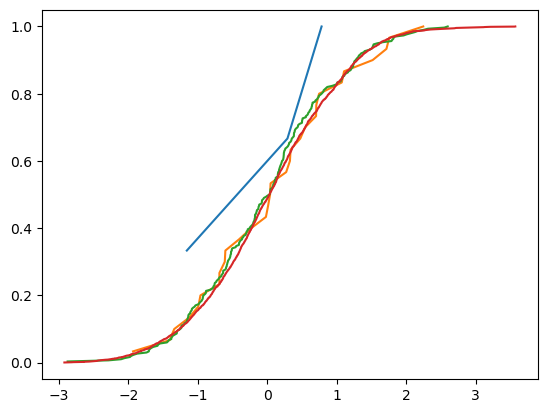

In [64]:
import numpy as np
import seaborn as sns

rng = np.random.default_rng(100)

def my_ecdf(X):
    X = np.sort(X)
    N = X.size
    y = np.arange(1, N+1) / N
    return X, y

for N in (3,30,300,3000):
    X = rng.normal(0,1,N)
    # ECDF plot goes here:
    my_ecdf(X)
    #sns.scatterplot(x=my_ecdf(X)[0], y=my_ecdf(X)[1], marker='.')
    sns.lineplot(x=np.sort(X), y=my_ecdf(X)[1])#add a legend for colors
    

    

As the sample size N increases, the plot's curve becomes smoother and smother and it gets cluser to the "true" value

4. A **quantile** generalizes the concept of the median so that instead of 50% of the mass below and 50% above, the $q$-quantile is the value for which $q$ proportion of the data are below that value and $(1-q)$ proportion of the data are above that value. This is a concept of **order**.

- Write a function that computes any quantile without using Numpy's `np.quantile`
- Write a function that computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR
- Write a function that computes a five-number summary and values for a boxplot: the minimum, the .25 quantile, the median, the .75 quantile, and the maximum, and the whiskers
- Anything outside the whiskers is an **outlier**; write a function that returns a Boolean vector indicating if the observations are outliers.
- For a numeric variable of your choice from one of the datasets, apply your functions from above, and compare your answers with `sns.boxplot` and `df.describe`. 

In [141]:
df = pd.read_csv('mn_police_use_of_force.csv')

In [68]:
arr = [0,0,1,2]
len(arr)
arr[len(arr)//2]

1

In [168]:
def calculate_quantile(incoming_data, decimal_quantile_number):
    incoming_data = np.sort(incoming_data.dropna())
    index = (decimal_quantile_number * (incoming_data.size - 1))
    int_index = index//1
    #print(int_index)
    dec_index = index - int_index
    #print(dec_index)
    if dec_index == 0:
        return incoming_data[int(int_index)]
    else:
        index_one = incoming_data[int(int_index)]
        index_two = incoming_data[int(int_index + 1)]
        diff = index_two - index_one
        return index_one + diff * dec_index

    
#formula source: https://courses.lumenlearning.com/introstats1/chapter/measures-of-the-location-of-the-data/

In [156]:
print(calculate_quantile(df['age'], 0.25))
print(calculate_quantile(df['age'], 0.5))
print(calculate_quantile(df['age'], 0.75))

print((df['age'].quantile([0.25,0.5,0.75])))


22.0
28.0
35.0
0.25    22.0
0.50    28.0
0.75    35.0
Name: age, dtype: float64


In [157]:
def calculate_iqr_and_whisker(incoming_data):
    # formular from: https://www.statisticshowto.com/calculators/interquartile-range-calculator/
    iqr = calculate_quantile(incoming_data, 0.75) - calculate_quantile(incoming_data, 0.25)
    upper_whisker = calculate_quantile(incoming_data, 0.75)+iqr*1.5
    lower_whisker = calculate_quantile(incoming_data, 0.25)-iqr*1.5
    return [iqr, upper_whisker, lower_whisker]

In [158]:
print(calculate_iqr_and_whisker(df['age']))


[np.float64(13.0), np.float64(54.5), np.float64(2.5)]


In [161]:
def five_num_summary(incoming_data):
    incoming_data = incoming_data.dropna()
    quantile25 = calculate_quantile(incoming_data, 0.25)
    quantile75 = calculate_quantile(incoming_data, 0.75)
    median = calculate_quantile(incoming_data, 0.5)
    upper_whisker = calculate_iqr_and_whisker(incoming_data)[1]
    lower_whisker = calculate_iqr_and_whisker(incoming_data)[2]
    incoming_data = np.sort(incoming_data)
    min = incoming_data[0]
    max = incoming_data[-1]
    return_statement = "min: " + str(min) + ", Q1: " + str(quantile25) + ", median: " + str(median) + ", Q3: " + str(quantile75) + ", max: " + str(max) + ", lower whisker: " + str(lower_whisker) + ", upper whisker: " + str(upper_whisker)
    return return_statement

In [169]:
print(five_num_summary(df['age']))
df['age'].describe()

min: 0.0, Q1: 22.0, median: 28.0, Q3: 35.0, max: 82.0, lower whisker: 2.5, upper whisker: 54.5


count    11859.000000
mean        29.484527
std         10.987780
min          0.000000
25%         22.000000
50%         28.000000
75%         35.000000
max         82.000000
Name: age, dtype: float64

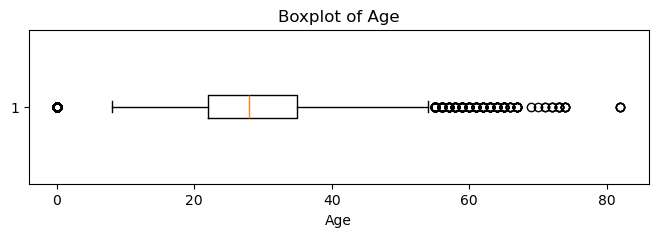

In [165]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 2))
plt.boxplot(df['age'].dropna(), vert=False)
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

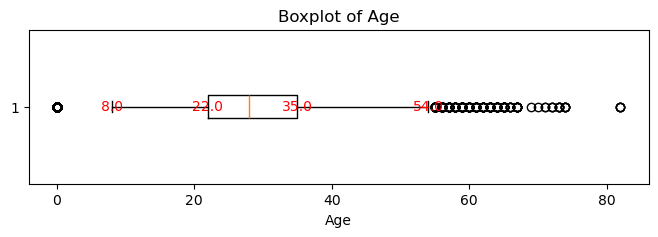

In [170]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 2))
box = plt.boxplot(df['age'].dropna(), vert=False)
whisker_data = [whisker.get_xdata() for whisker in box['whiskers']]

# Add labels at the whisker endpoints
for whisker in whisker_data:
    for x in whisker:
        plt.text(x, 1, f'{x:.1f}', va='center', ha='center', color='red')

plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

5. The kernel density estimator captures the concentration of the data around various points, and is defined as
$$
\hat{f}_{N,h}(z) = \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k \left( \frac{x_i - z}{h}\right)
$$
where $h$ is the bandwidth and $k()$ is one of the kernel functions from the class materials (Gaussian, Epanechnikov, uniform, triangular).

- Write a function that takes the bandwidth $h$ as given, and computes and plots $\hat{f}_{N,h}(z)$, for the kernels listed in the slides
- Write a function that computes the plug-in bandwidth
- Use your functions to analyze some numeric variables from a dataset of your choice, using a variety of bandwidths
- Compare bandwidths that are greater or less than the plug-in value with the results for the plug-in value. When does the KDE appear to be overfitting? Underfitting?

In [ ]:
# formula source: https://towardsdatascience.com/kernel-density-estimation-explained-step-by-step-7cc5b5bc4517/

In [192]:
def kde(x, h, kernel = "guassian"):
    N=len(x)
    z = np.linspace(x.min(), x.max(), 100)
    kde_vals = []
    for z_val in z:
        z_val = (x - z_val) / h
        if kernel == "guassian":
            kern_val = (1/np.sqrt(2*np.pi)) * np.exp(-0.5*(z_val**2/h))
            kde_vals.append(np.sum(kern_val) / (N * h))
        elif kernel == "epanechnikov":
            kern_val = 0.75 * (1 - z_val**2) * (np.abs(z_val) <= 1)
            kde_vals.append(np.sum(kern_val)/(N * h))
        elif kernel == "uniform":
            kern_val = 0.5 * (np.abs(z_val) <= 1)
            kde_vals.append(np.sum(kern_val)/(N * h))
        elif kernel == "triangular":
            kern_val = (1 - np.abs(z_val)) * (np.abs(z_val) <= 1)
            kde_vals.append(np.sum(kern_val)/(N * h))
        else:
            return "enter valid kernel (all lower-case)"
    return kde_vals
    

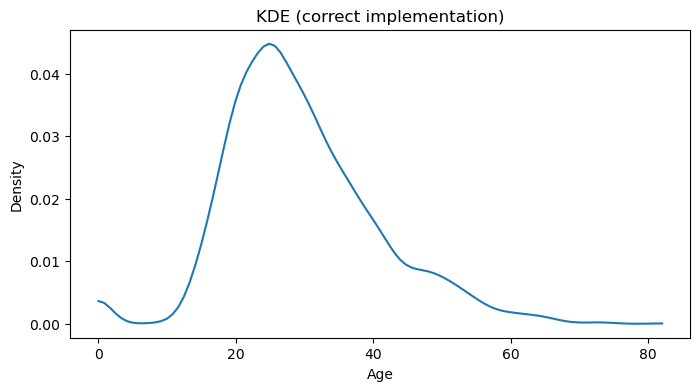

In [193]:
def kde(X, h, z, kernel="gaussian"):
    def gaussian_kernel(u):
        return np.exp(-0.5 * u**2) / np.sqrt(2 * np.pi)
    kernels = {"gaussian": gaussian_kernel}
    k = kernels[kernel]
    N = X.size
    kde_vals = []
    for zi in z:
        u = (X - zi) / h
        kde_vals.append(np.sum(k(u)) / (N * h))
    return kde_vals

X = df['age'].dropna().values
z = np.linspace(X.min(), X.max(), 100)
h = 2
kde_vals = kde(X, h, z, kernel="gaussian")

plt.figure(figsize=(8, 4))
plt.plot(z, kde_vals)
plt.title('KDE (correct implementation)')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

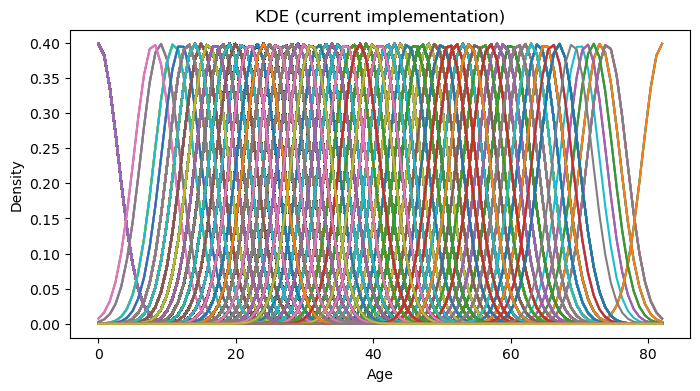

In [191]:
import matplotlib.pyplot as plt

X = df['age'].dropna().values
h = 2
z = np.linspace(X.min(), X.max(), 100)

kde_vals = kde(X, h, kernel = "guassian")

plt.figure(figsize=(8, 4))
plt.plot(z, kde_vals)
plt.title('KDE (current implementation)')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def kde(X, h, z, kernel="gaussian"):
    def gaussian_kernel(u):
        return np.exp(-0.5 * u**2) / np.sqrt(2 * np.pi)
    def epanechnikov_kernel(u):
        return 0.75 * (1 - u**2) * (np.abs(u) <= 1)
    def uniform_kernel(u):
        return 0.5 * (np.abs(u) <= 1)
    def triangular_kernel(u):
        return (1 - np.abs(u)) * (np.abs(u) <= 1)
    kernels = {
        "gaussian": gaussian_kernel,
        "epanechnikov": epanechnikov_kernel,
        "uniform": uniform_kernel,
        "triangular": triangular_kernel
    }
    k = kernels[kernel]
    N = X.size
    kde_vals = []
    for zi in z:
        u = (X - zi) / h
        kde_vals.append(np.sum(k(u)) / (N * h))
    return kde_vals

X = df['age'].dropna().values
z_grid = np.linspace(X.min(), X.max(), 100)
h = 5

plt.figure(figsize=(8, 4))
plt.plot(z_grid, kde(X, h, z_grid, kernel="gaussian"))
plt.title('KDE (correct implementation)')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()